importing important libraries 

In [ ]:
import plotly.express as px
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.tokenize.toktok import ToktokTokenizer
import nltk 
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup

In [ ]:
#Load the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data
movie_reviews = pd.read_csv('/content/sample_data/IMDB Dataset.csv')


this dataset was created by a research group in Stanford AI Lab for binary classification problem

#Quality Issues 



*   stop words


*   label (sentiment) should be 0 and 1 in order to train the model 

*   issues with column review 

*   contractions
*   html tags

*   hyperlinks

*   special characters

*  letters should be in lower  case


## **data exploration and assesing**

In [ ]:
#View the data
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
movie_reviews.sample(1)

,review,sentiment
3726,Something strange is happening in Loch Ness. T...,negative


In [ ]:
movie_reviews.shape

(50000, 2)

In [ ]:
sum(movie_reviews.isnull().any(axis=1))

0

In [ ]:
movie_reviews.isnull().sum(axis = 0)

review       0
sentiment    0
dtype: int64

In [ ]:
movie_reviews.dtypes

review       object
sentiment    object
dtype: object

In [ ]:
#checking total value counts for the sentiment column --popsitive and negative
movie_reviews["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
names = movie_reviews.index
print(names)

RangeIndex(start=0, stop=50000, step=1)


In [ ]:
#Basic information
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 50000 entries, 0 to 49999

Data columns (total 2 columns):

 #   Column     Non-Null Count  Dtype 

---  ------     --------------  ----- 

 0   review     50000 non-null  object

 1   sentiment  50000 non-null  object

dtypes: object(2)

memory usage: 781.4+ KB


In [ ]:
for index,text in enumerate(movie_reviews['review'][60:65]):
  print('review %d:\n'%(index+1),text)

review 1:

 What happened? What we have here is basically a solid and plausible premise and with a decent and talented cast, but somewhere the movie loses it. Actually, it never really got going. There was a little excitement when we find out that Angie is not really pregnant, then find out that she is after all, but that was it. Steve Martin, who is a very talented person and usually brings a lot to a movie, was dreadful and his entire character was not even close to being important to this movie, other than to make it longer. I really would have liked to see more interactions between the main characters, Kate and Angie, and maybe try not for a pure comedy, which unfortunately it was not, but maybe a drama with comedic elements. I think if the movie did this it could have been very funny since both actresses are quite funny in their own ways and sitting here I can think of numerous scenarios that would have been a riot.

review 2:

 I've just watched Fingersmith, and I'm stunned to se

## **Data Cleaning**

1- uploadig the nltk library for stopwords

In [ ]:
nltk.download('stopwords')
tokenizers = ToktokTokenizer()
stopwords = nltk.corpus.stopwords.words("english")
print("done")

done


[nltk_data] Downloading package stopwords to /root/nltk_data...

[nltk_data]   Unzipping corpora/stopwords.zip.


2- converting all letters in column review to lower case letter

In [ ]:
movie_reviews['review'] = movie_reviews['review'].str.replace('\n',' ').str.lower()

3- removing html tags ina regex pattern, removing special characters in the second regex pattern pattern, while It converts the text to lowercase and tokenizes the text into individual words.

Also, It applies lemmatization to each word in the text using the WordNet lemmatizer from the NLTK library, which reduces each word to its base or dictionary form. The base form of a word is known as its lemma.

finally, It joins the lemmatized words back into a single string.

Additionally, the lemmatizer object using the WordNetLemmatizer() function from the NLTK library and a stemming object using the Porter stemming algorithm from the NLTK library

In [ ]:
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()
CLEANR = re.compile('<.*?>')

def clean(review):
    review = re.sub(CLEANR, '', review) # remove html tags
    review = re.sub('[^a-zA-Z ]', '', review)
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(i) for i in review]
    return ' '.join(review)
print("done")

done


In [ ]:
# define function for removing HTML tags from text
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# apply function to text column
movie_reviews["review"] = movie_reviews["review"].apply(remove_html_tags)

print("done")

<ipython-input-16-c9c14b4fd5a3>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

  soup = BeautifulSoup(text, "html.parser")


done


4- converting label into numerical values

In [ ]:
movie_reviews.sentiment.replace("positive", 1, inplace=True)
movie_reviews.sentiment.replace("negative", 0, inplace=True)
movie_reviews.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [ ]:
#Find the duplicates

movie_reviews.duplicated().sum()

419

In [ ]:
#Find null values

movie_reviews.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
#Review any example
movie_reviews['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

5- removing contractions 

In [ ]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}
print("done")



done


In [ ]:
movie_reviews['review'] = movie_reviews['review'].replace(contractions_dict,regex=True)
movie_reviews.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there is a family where a little boy...,0
4,"petter mattei is ""love in the time of money"" i...",1


In [ ]:
#remove special characters

def remove_special(text):
    x = ''
    
    for i in text:
        if i.isalnum():
            x = x+i
        else:
            x = x+ ' '
    return x
movie_reviews['review']= movie_reviews['review'].apply(remove_special)


In [ ]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

6- removing stop words
Stop words are commonly used words in a language (such as "the", "and", "is", etc.) that are generally considered to be irrelevant or redundant in natural language processing tasks.

it checks if the word is a stop word in English using the stopwords.words('english') method from (NLTK) library. If the word is a stop word, an empty string is appended to the new_text list. Otherwise, the original word is appended to the new_text list.

In [ ]:
#remove stopwords

def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
            
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

movie_reviews['review']= movie_reviews['review'].apply(remove_stopwords)


7- remove_url
 
that takes a string of text as input and removes any URLs (web links) from the text. 

 a regular expression pattern is defined using the re.compile method. This pattern matches any string that starts with "http://" or "https://" and continues until the next whitespace character is encountered. The pattern is saved to the variable pattern.

The function then applies the sub method to the pattern variable, which replaces any matches of the pattern in the input text with an empty string. This effectively removes any URLs from the input text.

In [ ]:
#Remove URLs

def remove_url(text):

    pattern = re.compile(r'https?://\S+')
    return pattern.sub(r'', text)

movie_reviews['review'] = movie_reviews['review'].apply(remove_url)
movie_reviews

,review,sentiment
0,one reviewers mentioned watching 1 oz e...,1
1,wonderful little production filming techniqu...,1
2,thought wonderful way spend time hot s...,1
3,basically family little boy jake thinks ...,0
4,petter mattei love time money visually s...,1
...,...,...
49995,thought movie right good job creative...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schoo...,0
49998,going disagree previous comment side ...,0


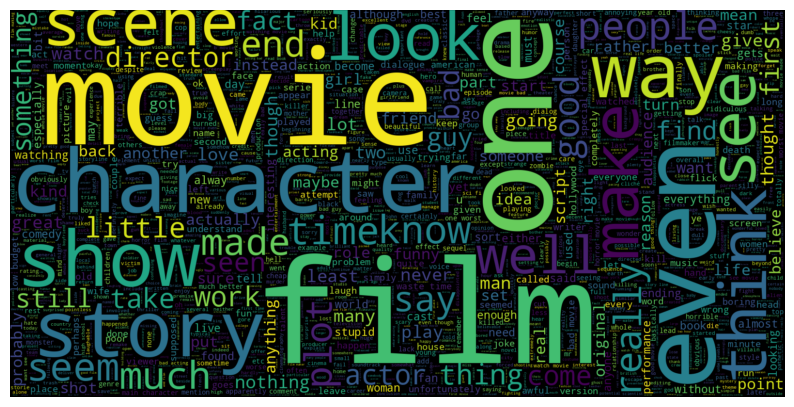

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize=(10, 10))

# Generate WordCloud for negative reviews
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(movie_reviews[movie_reviews.sentiment == 0].review))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Remove axis               

plt.show()


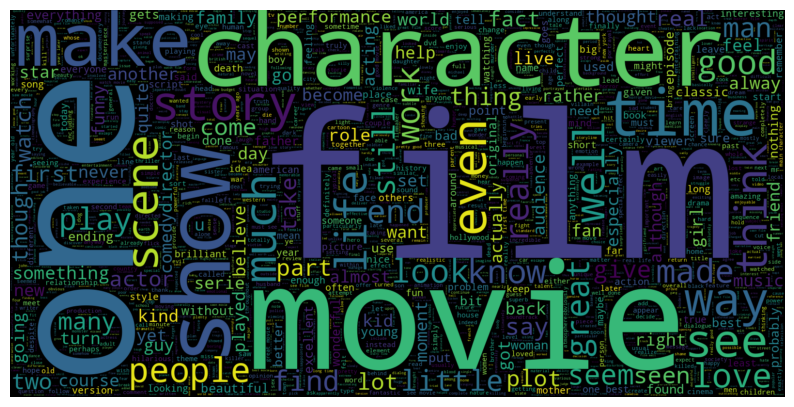

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Generate WordCloud for positive reviews
plt.figure(figsize=(10, 10))
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(movie_reviews[movie_reviews.sentiment == 1].review))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# define the possible sentiment values
sentiments = ['positive', 'negative']

# create a OneHotEncoder object
encoder = OneHotEncoder(categories=[sentiments])

# encode the positive sentiment string
positive_sentiment = 'positive'
positive_sentiment_encoded = encoder.fit_transform([[positive_sentiment]]).toarray()

print('One-hot encoded vector for positive sentiment:')
print(positive_sentiment_encoded)

One-hot encoded vector for positive sentiment:

[[1. 0.]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# define the possible sentiment values
sentiments = ['positive', 'negative']

# create a OneHotEncoder object
encoder = OneHotEncoder(categories=[sentiments])

# encode the negative sentiment string
negative_sentiment = 'negative'
negative_sentiment_encoded = encoder.fit_transform([[negative_sentiment]]).toarray()

print('One-hot encoded vector for negative sentiment:')
print(negative_sentiment_encoded)

One-hot encoded vector for negative sentiment:

[[0. 1.]]


In [ ]:
# make ram boom
from sklearn.feature_extraction.text import CountVectorizer

# extract the sentiment and review columns
sentiment = movie_reviews['sentiment']
reviews = movie_reviews['review']

# convert the text data into numerical data using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews)

# compute the correlation between the sentiment and review columns
correlation_matrix = pd.DataFrame(X.toarray()).corrwith(sentiment)

# print the correlation coefficients
print(correlation_matrix)

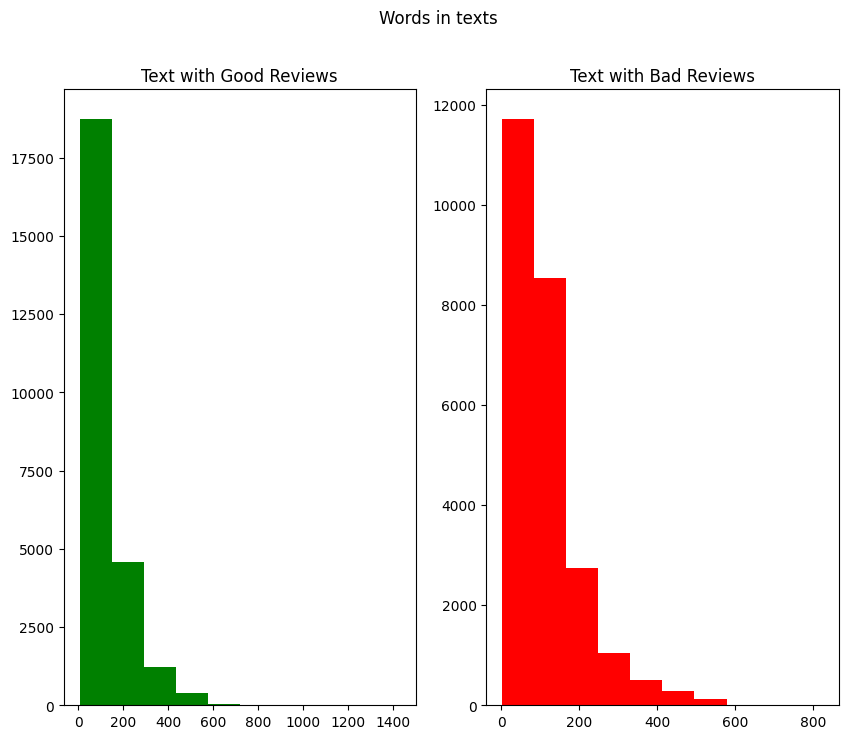

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,8))
text_len=movie_reviews[movie_reviews['sentiment']==1]['review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Text with Good Reviews')
text_len=movie_reviews[movie_reviews['sentiment']==0]['review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Words in texts')
plt.show()

In [ ]:
 
# Split the data into x and y
X = movie_reviews.review  # Input features
y = movie_reviews.sentiment  # Target variable

# Split the data into 80% training and 20% testing, using random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Print the shape of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (40000,)

Testing data shape: (10000,)

Training labels shape: (40000,)

Testing labels shape: (10000,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
vec = vec.fit(X_train)
x_train = vec.transform(X_train)
x_test = vec.transform(X_test)

# Multinominal Naive Bayes 

### The Gaussian assumption just presented is far from the only basic assumption that may be used to characterize the generating distribution for each label. Another helpful example is multinomial naive Bayes, where the features are believed to be generated by a simple multinomial distribution. The multinomial distribution describes the likelihood of witnessing counts in a variety of categories, hence multinomial naive Bayes is best suited for features that represent counts or count rates.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_hat = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_test, y_hat))

Accuracy is  0.8596


In [ ]:
y_pred = model.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_train, y_pred))

Accuracy is  0.9068


## **hyperparameter alpha**
 the alpha hyperparameter is a smoothing parameter used to avoid zero probabilities. It is used in the calculation of the likelihood probabilities of each feature for each class in the Naive Bayes algorithm.

The alpha hyperparameter is used in the Laplace smoothing technique, also known as additive smoothing. 

The value of alpha determines the strength of the smoothing. A larger alpha value results in stronger smoothing, meaning that the impact of the original frequency counts of the features is reduced, and the probability estimates become more similar across all features. A smaller alpha value results in weaker smoothing, meaning that the original frequency counts have a greater impact on the probability estimates.


In [ ]:
alpha_ranges = {
    "alpha": [0.001, 0.01, 0.1, 1, 10.0, 100]
}

In [ ]:
grid_search = GridSearchCV(model, param_grid=alpha_ranges, scoring='accuracy', cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10.0, 100]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat, average='weighted')
recall = recall_score(y_test, y_hat, average='weighted')
f1 = f1_score(y_test, y_hat, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_hat)
print("Confusion matrix:")
print(cm)

Accuracy: 0.8596

Precision: 0.860104281384804

Recall: 0.8596

F1-score: 0.8595280425845598

Confusion matrix:

[[4430  605]

 [ 799 4166]]


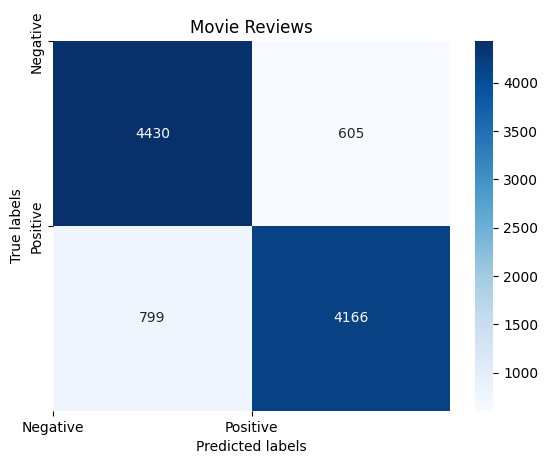

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#Create a confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Movie Reviews')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])

# Show the plot
plt.show()

In [ ]:
grid_search.best_estimator_

MultinomialNB(alpha=10.0)

In [ ]:
classifier = MultinomialNB(alpha=1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=1)

In [ ]:
predict = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("Accuracy is ", classification_report(y_test, predict))

Accuracy is                precision    recall  f1-score   support



           0       0.85      0.88      0.86      5035

           1       0.87      0.84      0.86      4965



    accuracy                           0.86     10000

   macro avg       0.86      0.86      0.86     10000

weighted avg       0.86      0.86      0.86     10000




In [ ]:
train_acc = grid_search.cv_results_['mean_train_score']
train_std = grid_search.cv_results_['std_train_score']

test_acc = grid_search.cv_results_['mean_test_score']
test_std = grid_search.cv_results_['std_test_score']

In [ ]:
alpha_ranges = [0.001, 0.01, 0.1, 1, 10.0, 100]

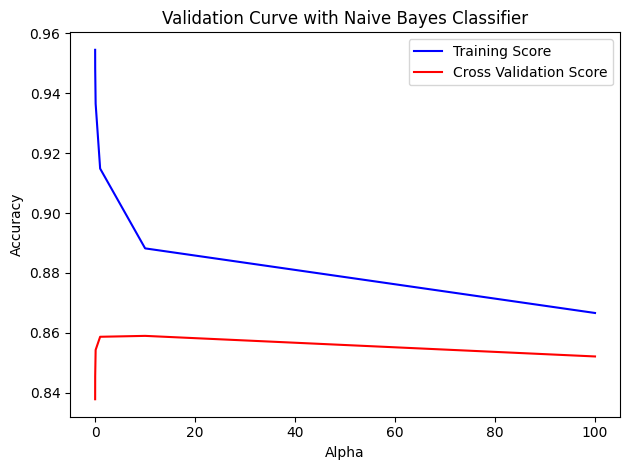

In [ ]:
plt.plot(alpha_ranges, train_acc, label="Training Score", color='b') 
plt.plot(alpha_ranges, test_acc, label="Cross Validation Score", color='r')

plt.title("Validation Curve with Naive Bayes Classifier")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

# Support Vector Machine

In order to divide various classes in multidimensional space, SVM creates a hyperplane. In order to reduce error, SVM constructs an ideal hyperplane iteratively. The main goal of SVM is to identify the maximum marginal hyperplane (MMH) that best classifies the dataset.

## ***SVM consists of the following:***

### **Support Vectors**
#### The data points nearest to the hyperplane are called support vectors. By computing margins, these points will better define the separation line. These points are more relevant to the classifier's construction.

### **Hyperplane** 
### A hyperplane is a decision plane that divides a group of objects with various class memberships.

### **Margin**
### A margin is the distance between two lines at the nearest class points. This is determined as the perpendicular distance between the line and the nearest support vectors or points. A wider margin between classes is regarded a good margin; a smaller margin is considered a bad margin.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(X_train)
# also fit the test_x_vector
test_x_vector = tfidf.transform(X_test)


## **difference between linear kernel and RBF kernel:**

1. Mathematical Form: 
The linear kernel computes the dot product between two input vectors, resulting in a linear function that maps the input data to a higher dimensional space. The RBF kernel, computes the similarity between two input vectors using a Gaussian function, which results in a non-linear function that maps the input data to an infinite dimensional space.

2. Decision Boundaries: 
The linear kernel produces a linear decision boundary, which is a straight line or plane that separates the data into two classes. In contrast, the RBF kernel produces a non-linear decision boundary that is curved and can capture more complex relationships between the input features.

3. Complexity: 
The linear kernel is less complex and computationally faster than the RBF kernel, making it more efficient for large datasets. On the other hand, the RBF kernel is more flexible and can capture more complex patterns in the data, but it also has more hyperparameters to tune, which can make it prone to overfitting if not properly optimized.


In [ ]:
#Import svm model
from sklearn import svm

#Creating a svm Classifier
svm = svm.SVC(kernel='linear') 

#Training the model 
svm.fit(train_x_vector , y_train)

SVC(kernel='linear')

In [ ]:
#Predict the response for test dataset
y_pred = svm.predict(test_x_vector)

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8911


In [ ]:
#Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

#Recal
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8840665873959572

Recall: 0.8984894259818731


## **hyperparameters in support vector machines:**
- C: The regularization parameter that controls the trade-off between low training error and a low testing error. It is a positive float value, with smaller values indicating stronger regularization e.g[0.1, 1, 10, 100, and 1000]

- gamma: The kernel coefficient for the RBF (Radial Basis Function) kernel, which controls the shape of the decision boundary. Smaller values of gamma will result in a smoother decision boundary, while larger values will result in a more complex decision boundary. T


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  

grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits

[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=21.9min

[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=21.5min

[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=21.5min

[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=21.1min

[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=21.3min

[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.501 total time=21.1min

[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.501 total time=21.1min


In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(x_test)
  
print(classification_report(y_test, grid_predictions))